In [1]:

import matplotlib.pyplot as plt
import pathlib
from PIL import Image
import numpy as np
import cv2
import pandas as pd
import seaborn as sns
import albumentations as A
import random

In [163]:
#sätt source o destinatiom
source_root = pathlib.Path(r'C:\Users\AndreasP\Desktop\StudieGrupp3_MLProjekt\data\raw\dataset_1\yes')
dest_root = pathlib.Path(r'C:\Users\AndreasP\Desktop\cropped_yes')

In [160]:
temp_list = []
p1 = source_root.glob('*/')
file_paths = [x for x in p1 if x.is_file()]
for file_p in file_paths:
    temp_list.append(file_p)
print("antal filer:", len(temp_list))

antal filer: 76


(340, 339)

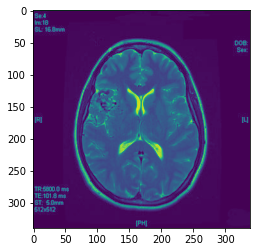

In [151]:
fname="No14.jpg"
#fname="no 97.jpg"
#fname="23 no.jpg"
com_path=source_root / fname
com_path
image = cv2.imread(str(com_path))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
gray.shape

plockar ur alla filer

In [164]:
temp_list = []
p1 = source_root.glob('*/')
file_paths = [x for x in p1 if x.is_file()]
for file_p in file_paths:
    temp_list.append(file_p)
print("antal filer:", len(temp_list))

antal filer: 133


In [161]:
def encode(arr, thresh, max = 1):
    arr = np.where(arr < thresh, 0, arr)
    arr = np.where(arr != 0, max, arr).astype(int)
    return arr


In [165]:
frame = 3                                               # klipper av en ram runt bilden direkt eftersom mkt smuts sitter där
IMG_SIZE = (224,224)                                    # detta är storleken som bilderna rezas till
for f in temp_list:
    image = cv2.imread(str(f))                          
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    temp = gray[frame:-frame, frame:-frame]             # temp är bild-numpyn
    res_std_x = np.std(temp, axis = 0)                  #skapar en arr med standardavvikelse för x och y
    res_std_y = np.std(temp, axis = 1)

    res_std_x = encode(res_std_x, 0.1)                  # encode gör en arr "binär"; allt < 0.1 -> 0 allt annat = 1
    res_std_y = encode(res_std_y, 0.1)

    calc_arr = encode(temp, 40, 255)                    # ändrar tröskelvärdet i bilden. Allt under 40 -> 0, allt annat = 255

    res_sum_x = np.sum(calc_arr, axis = 0)              # skapar en arr med summor av linjer i x och y
    res_sum_y = np.sum(calc_arr, axis = 1)

    res_sum_ = encode(res_sum_x, 1000)                  # gör binär kodning; allt < 1000 -> 0, allt annat =1
    res_sum_y = encode(res_sum_y, 1000)

    sigma_x = res_std_x * res_sum_x                     # mutliplicerar ihop de båda metoderna sum * std
    sigma_y = res_std_y * res_sum_y                     # då framträder det 0 på alla rader med imformation som ska bort

    half_width = int(.5 * len(sigma_x))                 # delar bildens bredd för sökning
    half_height = int(.5 * len(sigma_y))                # delar bildens höjd för sökning

    left_val = np.where(sigma_x[:half_width] == 0)[0]       # söker från vänster mot mitten
    right_val = np.where(sigma_x[half_width:] == 0)[0]      # söker från mitten till högerkant

    top_val = np.where(sigma_y[:half_height] == 0)[0]       # söker från toppen
    bottom_val = np.where(sigma_y[half_height:] == 0)[0]    # söker från mitten ner mot botten


    if len(left_val) > 0:                       # om värde '0' hittats så är längden > 0
        left_x = left_val[-1]                   # tar sista värdet i arr dvs det närmst mitten
    else:
        left_x = 0 

    if len(right_val) > 0:                      # om värde '0' hittats så är längden > 0
        right_x = right_val[0] + half_width     # tar först värdet i arr eftersom sökningen börjar mitt i bild
    else:
        right_x = len(sigma_x)

    if len(top_val) > 0:                        # om värde '0' hittats så är längden > 0
        top_y = top_val[-1]                     # tar sista värdet i arr dvs det närmst mitten
    else:
        top_y = 0 

    if len(bottom_val) > 0:                     # om värde '0' hittats så är längden > 0
        bottom_y = bottom_val[0] + half_height  # tar först värdet i arr eftersom sökningen börjar mitt i bild
    else:
        bottom_y = len(sigma_y)

    new_image = gray[top_y + frame:bottom_y - frame, left_x + frame:right_x - frame]    # här appliceras frame på alla mått
    
    save_path = dest_root / f.name                                                      # sparar ner filen mend samma namn i dest mappen 
    new_image = cv2.resize(new_image, IMG_SIZE)
    imx = Image.fromarray(new_image)
    imx.save(save_path)



(0, 277, 1, 350)

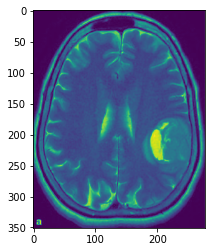

In [166]:
plt.imshow(temp)


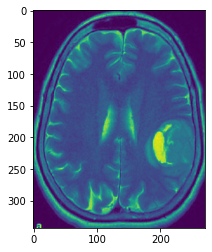

In [167]:
temp.shape

plt.imshow(gray[top_y+frame:bottom_y-frame,left_x+frame:right_x-frame])

In [98]:



x = np.array([1,3,2,4,3,5,4,5,6,7,8])
np.where(x == 0)[0]

array([], dtype=int64)